# Irish Beef prices

https://data.cso.ie/table/AJM01

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
from pandas.tseries.offsets import MonthEnd, YearEnd


# user defined - see utils.py
from utils import snake_case_columns, beef_price_lineplot, cso_date_to_datetime, transform_indexmundi_yearly_data

In [ ]:
df_beef = pd.read_csv("data/ie/beef_prices_1976-2022_cso.csv")

In [ ]:
# value is: Cattle Price per 100 Kg (Euro)
df_beef.head()

In [ ]:
df_beef.info()

In [ ]:
snake_case_columns(df_beef)

In [ ]:
cso_date_to_datetime(df_beef, "month")

In [ ]:
df_beef = df_beef[df_beef["month"].dt.year > 1998]

In [ ]:
df_beef["type_of_cattle"].unique()

In [ ]:
df_beef = df_beef[df_beef["type_of_cattle"]!="Cows for slaughter"]

In [ ]:
df_beef = df_beef.astype(dtype= {"value":"float64"})

In [ ]:
df_beef.head()

In [ ]:
df_beef.info()

In [ ]:
df_beef.groupby(['type_of_cattle']).count()

In [ ]:
df_beef.isnull().any()

In [ ]:
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
df_beef_na = df_beef[df_beef.isna().any(axis=1)]
print(df_beef_na.count())
#df_beef_na

In [ ]:
# forward fill missing values as there is only 52

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
cattle_types = df_beef["type_of_cattle"].unique()
for cattle_type in cattle_types:
    df_beef_by_cattle_type = df_beef[df_beef["type_of_cattle"] == cattle_type]
    df_beef_by_cattle_type = df_beef_by_cattle_type.fillna(method="ffill")
    df_beef[df_beef["type_of_cattle"] == cattle_type] = df_beef_by_cattle_type

In [ ]:
df_beef.groupby(['type_of_cattle']).count()

In [ ]:
# https://stackoverflow.com/questions/17957890/pandas-select-from-dataframe-using-startswith
df_bullocks = df_beef[df_beef["type_of_cattle"].str.startswith('Bullocks')]

In [ ]:
beef_price_lineplot('Bullock prices per 100 Kg 1999-2022', df_bullocks)

In [ ]:
df_heifers = df_beef[df_beef["type_of_cattle"].str.startswith('Heifer')]

In [ ]:
beef_price_lineplot('Heifer prices per 100 Kg 1999-2022', df_heifers)

In [ ]:
df_beef.shape

In [ ]:
df_beef = df_beef.drop(["statistic", "unit"], axis=1)

In [ ]:
df_beef_2 = df_beef.pivot(index='month', columns='type_of_cattle', values='value')

In [ ]:
snake_case_columns(df_beef_2)

In [ ]:
df_beef_2['target_cattle'] = df_beef_2.mean(axis=1)

## final output

In [ ]:
df_beef_2

# AGRICULTURAL PRICE INDICES

https://www.cso.ie/en/methods/agricultureandfishing/agriculturalpriceindices/methodology-agriculturalpriceindices/#:~:text=The%20Output%20Price%20Index%20is,of%20the%20average%20farm%20concept

"The Output Price Index is based on the sales of agricultural products and the Input Price Index is based on the purchases of the means of agricultural production by agricultural producers. Both indices are compiled on the basis of the average farm concept. The average farm concept includes both sales to other economic sectors as well as sales/purchases of agricultural output between agricultural units for intermediate consumption purposes, excluding trade in animals between agricultural units."

## df_agri_price_2010

In [ ]:
df_agri_price_2010 = pd.read_csv("data/ie/agri_price_index/AHM01_1995M01-2010M12.csv")

In [ ]:
snake_case_columns(df_agri_price_2010)

In [ ]:
df_agri_price_2010.head()

In [ ]:
df_agri_price_2010.statistic.unique()

In [ ]:
df_agri_price_2010.unit.unique()

In [ ]:
sorted(df_agri_price_2010.agricultural_product.unique())

In [ ]:
df_agri_price_2010 = df_agri_price_2010.drop(["statistic", "unit"], axis=1)

In [ ]:
cso_date_to_datetime(df_agri_price_2010, "month")

In [ ]:
df_agri_price_2010

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.pivot.html
df_agri_price_2010_2 = df_agri_price_2010.pivot(index='month', columns='agricultural_product', values='value')

In [ ]:
snake_case_columns(df_agri_price_2010_2)

In [ ]:
import re
# https://stackoverflow.com/questions/16720541/python-string-replace-regular-expression
df_agri_price_2010_2.columns = map(lambda x : re.sub(r"[()]", "", x), df_agri_price_2010_2.columns)

In [ ]:
df_agri_price_2010_2 = df_agri_price_2010_2[df_agri_price_2010_2.index.year > 1998]

In [ ]:
df_agri_price_2010_2

In [ ]:
df_agri_price_2010_2.isnull().any()

In [ ]:
df_agri_price_2010_2.sugarbeet_output.isna().sum()

In [ ]:
df_agri_price_2010_2.sugarbeet_output.isna().count()

In [ ]:
df_agri_price_2010_2 = df_agri_price_2010_2.drop(["sugarbeet_output"], axis=1)

In [ ]:
df_agri_price_2010_2[df_agri_price_2010_2.index.year == 2000]

In [ ]:
df_agri_price_2010_2[df_agri_price_2010_2.index.year == 2010]

In [ ]:
# this data is based at 2000, we want to rebase it to 2010 so we can join it with the next dataset / time series for
# agricultural prices indices

# https://stats.stackexchange.com/questions/154577/how-to-work-with-index-numbers#:~:text=Rebasing%20an%20index,multiplying%20the%20result%20by%20100.
df_agri_price_2010_2_rebased = df_agri_price_2010_2 /df_agri_price_2010_2[df_agri_price_2010_2.index.year == 2010].mean() * 100

In [ ]:
df_agri_price_2010_2_rebased.shape

In [ ]:
df_agri_price_2010_2_rebased.isnull().sum()

### intermediate output

In [ ]:
df_agri_price_2010_2_rebased

## df_agri_price_2018

In [ ]:
df_agri_price_2018 = pd.read_csv("data/ie/agri_price_index/AHM03_2005M01-2018M01.csv")

In [ ]:
df_agri_price_2018

In [ ]:
snake_case_columns(df_agri_price_2018)

In [ ]:
df_agri_price_2018.statistic.unique()

In [ ]:
df_agri_price_2018.unit.unique()

In [ ]:
sorted(df_agri_price_2018.agricultural_product.unique())

In [ ]:
df_agri_price_2018 = df_agri_price_2018.drop(["statistic", "unit"], axis=1)

In [ ]:
cso_date_to_datetime(df_agri_price_2018, "month")

In [ ]:
df_agri_price_2018

In [ ]:
df_agri_price_2018_2 = df_agri_price_2018.pivot(index='month', columns='agricultural_product', values='value')

In [ ]:
snake_case_columns(df_agri_price_2018_2)

In [ ]:
df_agri_price_2018_2.columns

In [ ]:
df_agri_price_2018_2.isnull().any()

In [ ]:
df_agri_price_2018_2.columns

In [ ]:
col_names_2010=sorted(df_agri_price_2010_2_rebased.columns)

In [ ]:
col_names_2018=sorted(df_agri_price_2018_2.columns)

In [ ]:
sorted(col_names_2010)

In [ ]:
sorted(col_names_2018)

In [ ]:
col_names_2010_new = {}
for i in range(len(col_names_2010)):  
    name = col_names_2010[i]
    colname = re.sub(r"[_]{1,2}input|_output|_including_a.i.", "", col_names_2010[i])
    #print(colname,":", name)
    if colname == 'energy_-_electricity':
        col_names_2010_new[name] = 'electricity'
    elif colname == 'energy_-_motor_fuels':
        col_names_2010_new[name] = 'motor_fuel'
    elif colname == 'compound_feeding_stuffs_-_calf':
        col_names_2010_new[name] = 'motor_fuels' 
    elif colname == 'compound_feeding_stuffs_-_cattle':
        col_names_2010_new[name] = 'compound_feeding_stuffs_for_cattle_excluding_calves'
    elif colname == 'compound_feeding_stuffs_-_pig':
        col_names_2010_new[name] = 'compound_feeding_stuffs_for_pigs'
    elif colname == 'compound_feeding_stuffs_-_poultry':
        col_names_2010_new[name] = 'compound_feeding_stuffs_for_poultry'
    elif colname == 'compound_fertilisers_-_n.p.k.':
        col_names_2010_new[name] = 'npk_fertilisers'
    elif colname == 'compound_fertilisers_-_p.k.':
        col_names_2010_new[name] = 'pk_fertilisers'
    elif colname == 'other_products':
        col_names_2010_new[name] = 'other_goods_and_services'
    elif colname == 'total_crop_products':
        col_names_2010_new[name] = 'crop_output'
    elif colname == 'all_fertilisers':
        col_names_2010_new[name] = 'fertilisers'
    elif colname == 'all_feeding_stuffs':
        col_names_2010_new[name] = 'feeding_stuffs'
    elif colname == 'finished_cattle':
        col_names_2010_new[name] = 'cattle'
    else:
        col_names_2010_new[name] = colname

In [ ]:
col_names_2018_new = {}
for i in range(len(col_names_2018)): 
    name = col_names_2018[i]
    colname = re.sub(r"[_]{1,2}input|_output|_including_a.i.", "", col_names_2018[i])
    #print(colname,":", name)
    if colname == 'cereals_including_seeds':
        col_names_2018_new[name] = 'cereals'
    elif colname == 'potatoes_including_seeds':
        col_names_2018_new[name] = 'potatoes'

In [ ]:
col_names_2010_new

In [ ]:
col_names_2018_new

In [ ]:
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df_agri_price_2010_3 = df_agri_price_2010_2_rebased.rename(col_names_2010_new, axis=1)

In [ ]:
df_agri_price_2018_3 = df_agri_price_2018_2.rename(col_names_2018_new, axis=1)

In [ ]:
# intersection between 1995-2010 data and 2005-2018 data
sorted(list(set(df_agri_price_2010_3.columns) & set(df_agri_price_2018_3.columns)))

In [ ]:
set(df_agri_price_2010_3.columns)

In [ ]:
set(df_agri_price_2018_3.columns)

In [ ]:
df_agri_price_2018_3

In [ ]:
# all the means should be ~100 because this is the base year
# looks like everything is which is great (except wool, but we won't be including this anyway so doesn't matter)
df_agri_price_2018_3[df_agri_price_2018_3.index.year == 2010].mean()

In [ ]:
df_agri_price_2010_3

In [ ]:
# intersection between 1995-2010 data and 2005-2018 data
final_table_columns = sorted(list(set(df_agri_price_2010_3.columns) & set(df_agri_price_2018_3.columns)))

In [ ]:
len(df_agri_price_2010_3.columns)

In [ ]:
len(df_agri_price_2018_3.columns)

In [ ]:
# https://stackoverflow.com/questions/56891518/drop-columns-from-pandas-dataframe-if-they-are-not-in-specific-list
df_agri_price_indices = df_agri_price_2010_3[df_agri_price_2010_3.columns.intersection(final_table_columns)]

In [ ]:
df_tmp = df_agri_price_2018_3[df_agri_price_2018_3.columns.intersection(final_table_columns)]

In [ ]:
df_tmp = df_tmp[df_tmp.index.year > 2010]

In [ ]:
sorted(df_agri_price_indices.columns) == sorted(df_tmp.columns)

In [ ]:
print("df_agri_price_indices min date",":",df_agri_price_indices.index.min())
print("df_agri_price_indices max date",":",df_agri_price_indices.index.max())

print("df_tmp min date","               :",df_tmp.index.min())
print("df_tmp max date","               :",df_tmp.index.max())

In [ ]:
df_agri_price_indices = df_agri_price_indices.append(df_tmp)

In [ ]:
df_agri_price_indices

In [ ]:
fig, ax = plt.subplots(figsize=(18, 14))

sns.lineplot(ax = ax, x='month', y='motor_fuel', data=df_agri_price_indices, label="motor_fuel")
#sns.lineplot(ax = ax, x='month', y='potatoes', data=df_agri_price_indices, label="potatoes")
sns.lineplot(ax = ax, x='month', y='cattle', data=df_agri_price_indices, label="cattle")

ax.set_title("df_agri_price_indices")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

ax.yaxis.set_major_locator(ticker.MaxNLocator())
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Agri Products')

plt.show()

### Rebase Check

Check that the rebasing from base 2000 to base 2010 has worked before we append the 1995-2010 data to the 2005-2018 data !!


https://data.cso.ie/table/AHM01 -> 1995-2010 data 

https://data.cso.ie/table/AHM03 -> 2005-2018 data

**Rebase technique:** https://stats.stackexchange.com/questions/154577/how-to-work-with-index-numbers#:~:text=Rebasing%20an%20index,multiplying%20the%20result%20by%20100.

In [ ]:
start_year=2005
end_year=2010

In [ ]:
data_2018_base_2010 = df_agri_price_2018_3[
    (df_agri_price_2018_3.index.year >= start_year) & 
    (df_agri_price_2018_3.index.year <= end_year)].motor_fuel

In [ ]:
data_2010_rebased_2010 = df_agri_price_2010_3[
        (df_agri_price_2010_3.index.year >= start_year) & 
        (df_agri_price_2010_3.index.year <= end_year)].motor_fuel

In [ ]:
data_2010_base_2000 = df_agri_price_2010_2[
    (df_agri_price_2010_2.index.year >= start_year) &
    (df_agri_price_2010_2.index.year <= end_year)]["energy_-_motor_fuels__input"]

In [ ]:
len(data_2018_base_2010)

In [ ]:
len(data_2010_rebased_2010)

In [ ]:
len(data_2010_base_2000)

In [ ]:
data_mixed_bases=pd.merge(data_2018_base_2010, data_2010_rebased_2010, right_index=True, left_index=True)

In [ ]:
data_mixed_bases=pd.merge(data_mixed_bases, data_2010_base_2000, right_index=True, left_index=True)

In [ ]:
data_mixed_bases.rename(columns = {'motor_fuel_x':'2018_motor_fuel_base_2010',
                                   'motor_fuel_y':'2010_motor_fuel_rebased_2010',
                                  'energy_-_motor_fuels__input':'2010_motor_fuel_base_2000'}
                        , inplace = True)

In [ ]:
data_mixed_bases

In [ ]:
fig, ax = plt.subplots(figsize=(18, 14))

sns.lineplot(ax = ax, x='month', y='2018_motor_fuel_base_2010', data=data_mixed_bases, label="2018_motor_fuel_base_2010")
sns.lineplot(ax = ax, x='month', y='2010_motor_fuel_rebased_2010', data=data_mixed_bases, label="2010_motor_fuel_rebased_2010")
sns.lineplot(ax = ax, x='month', y='2010_motor_fuel_base_2000', data=data_mixed_bases, label="2010_motor_fuel_base_2000")

ax.set_title("Motor Fuel rebase check!")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html
ax.yaxis.set_major_locator(ticker.MaxNLocator())
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Motor Fuel')

plt.show()

In [ ]:
data_mixed_bases.isnull().sum()

rebasing looks like it has basically worked.. !

## df_agri_price_2022

https://data.cso.ie/table/AHM04

In [ ]:
df_agri_price_2022 = pd.read_csv("data/ie/agri_price_index/AHM04_2014M01-2022M02.csv")

In [ ]:
df_agri_price_2022

In [ ]:
snake_case_columns(df_agri_price_2022)

In [ ]:
df_agri_price_2022.statistic.unique()

In [ ]:
df_agri_price_2022.unit.unique()

In [ ]:
sorted(df_agri_price_2022.agricultural_product.unique())

In [ ]:
df_agri_price_2022 = df_agri_price_2022.drop(["statistic", "unit"], axis=1)

In [ ]:
cso_date_to_datetime(df_agri_price_2022, "month")

In [ ]:
df_agri_price_2022

In [ ]:
df_agri_price_2022_2 = df_agri_price_2022.pivot(index='month', columns='agricultural_product', values='value')

In [ ]:
snake_case_columns(df_agri_price_2022_2)

In [ ]:
df_agri_price_2022_2.isnull().any()

In [ ]:
df_agri_price_2022_2.columns

In [ ]:
col_names_2022=sorted(df_agri_price_2022_2.columns)
col_names_2022

In [ ]:
col_names_2022_new = {}
for i in range(len(col_names_2022)): 
    name = col_names_2022[i]
    colname = re.sub(r"[_]{1,2}input|_output|_including_a.i.", "", col_names_2022[i])
    #print(colname,":", name)
    if colname == 'cereals_including_seeds':
        col_names_2022_new[name] = 'cereals'
    elif colname == 'potatoes_including_seeds':
        col_names_2022_new[name] = 'potatoes'
    elif colname == 'fruit_and_vegetables':
        col_names_2022_new[name] = 'vegetables'

In [ ]:
col_names_2022_new

In [ ]:
df_agri_price_2022_3 = df_agri_price_2022_2.rename(col_names_2022_new, axis=1)

In [ ]:
len(df_agri_price_indices.columns)

In [ ]:
len(df_agri_price_2022_3.columns)

In [ ]:
# intersection between newly created 1995-2018 data and 2014-2022 data
len(sorted(list(set(df_agri_price_2022_3.columns) & set(df_agri_price_indices.columns))))

In [ ]:
# check that df_agri_price_2022_3 has exactly the same columns as df_agri_price_indices
# and that none are missing (empty list if none are missing)
temp1=(sorted(set(set(df_agri_price_2022_3.columns) & set(df_agri_price_indices.columns))))
temp2 = [x for x in df_agri_price_indices.columns if x not in temp1]
temp2

In [ ]:
df_agri_price_2022_3

In [ ]:
df_agri_price_indices[df_agri_price_indices.index.year == 2010].mean()

In [ ]:
# df_agri_price_2022_3 data is based at 2015
# we want to rebase df_agri_price_indices to 2015 (from 2010) so we 
# can add on the missing three years 2019-2022 to df_agri_price_indices

# https://stats.stackexchange.com/questions/154577/how-to-work-with-index-numbers#:~:text=Rebasing%20an%20index,multiplying%20the%20result%20by%20100.
df_agri_price_indices_rebased = df_agri_price_indices /df_agri_price_indices[df_agri_price_indices.index.year == 2015].mean() * 100

In [ ]:
df_agri_price_indices_rebased.isnull().sum()

In [ ]:
df_agri_price_indices_rebased

## df_agri_price_indices_final

In this section the series for the full date range is built (1995-2022).

In [ ]:
len(df_agri_price_indices_rebased.columns)

In [ ]:
# intersection between newly created 1995-2018 data and 2014-2022 data
len(sorted(list(set(df_agri_price_2022_3.columns) & set(df_agri_price_indices_rebased.columns))))

In [ ]:
df_tmp_2 = df_agri_price_indices_rebased[df_agri_price_indices_rebased.index.year < 2018]

In [ ]:
df_tmp_2.info()

In [ ]:
df_tmp_3 = df_agri_price_2022_3[df_agri_price_2022_3.index.year >= 2018]

In [ ]:
df_tmp_3.info()

In [ ]:
print("df_tmp_2 min date","  :",df_tmp_2.index.min())
print("df_tmp_2 max date","  :",df_tmp_2.index.max())

print("df_tmp_3 min date","  :",df_tmp_3.index.min())
print("df_tmp_3 max date","  :",df_tmp_3.index.max())

In [ ]:
df_agri_price_indices_final = df_tmp_2.append(df_tmp_3)

In [ ]:
df_agri_price_indices_final.isnull().sum()

In [ ]:
fig, ax = plt.subplots(figsize=(18, 14))

sns.lineplot(ax = ax, x='month', y='motor_fuel', data=df_agri_price_indices_final, label="motor_fuel")
#sns.lineplot(ax = ax, x='month', y='potatoes', data=df_agri_price_indices, label="potatoes")
sns.lineplot(ax = ax, x='month', y='cattle', data=df_agri_price_indices_final, label="fertilisers")

ax.set_title("df_agri_price_indices (1995-2022)")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

ax.yaxis.set_major_locator(ticker.MaxNLocator())
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Agri Products')

# https://stackoverflow.com/questions/44880444/how-to-increase-the-font-size-of-the-legend-in-my-seaborn-plot
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text

plt.show()

In [ ]:
df_agri_price_indices_final.isnull().sum()

In [ ]:
df_agri_price_indices_final =df_agri_price_indices_final.dropna(axis="columns")

In [ ]:
df_agri_price_indices_final.isnull().sum()

In [ ]:
df_agri_price_indices_final.info()

## final output

In [ ]:
df_agri_price_indices_final

# irish_pig_prices_1995-2022

Bring in www.bordbia.ie pig meat prices !

In [ ]:
df_pig = pd.read_excel("data/ie/irish_pig_prices_1995-2022.xlsx", skiprows=1)

In [ ]:
# https://www.mla.com.au/general/glossary/
# ¢/kg:  Cents per kilogram. Units which cattle are sold in at a physical prime market.
df_pig.head()

In [ ]:
df_pig = df_pig.rename({"w/c":"date","Ire (c/kg)":"cents_per_kg"}, axis=1)

In [ ]:
# https://stackoverflow.com/questions/736043/checking-if-a-string-can-be-converted-to-float-in-python
def is_float(element):
    try:
        float(element)
        return True
    except ValueError:
        return False

In [ ]:
df_pig["cents_per_kg"] = df_pig["cents_per_kg"].apply(lambda x: np.where(is_float(x), x, None))

In [ ]:
df_pig.isnull().any()

In [ ]:
df_pig_na = df_pig[df_pig.isna().any(axis=1)]
print(df_pig.count())

In [ ]:
# only 1 null value so no need to get too excited
df_pig.isnull().sum()

In [ ]:
df_pig = df_pig.fillna(method='ffill')

In [ ]:
df_pig.isnull().sum()

In [ ]:
df_pig.info()

In [ ]:
df_pig = df_pig.astype(dtype= {"cents_per_kg":"float64"})

In [ ]:
df_pig=df_pig.set_index("date").resample('M').mean()

In [ ]:
df_pig = df_pig[:-2] # get rid of mar and apr 2022

In [ ]:
df_pig = df_pig[df_pig.index.year > 1998]

## final output

In [ ]:
df_pig

# EUR/GBP

https://www.investing.com/currencies/eur-gbp-historical-data

In [ ]:
def prepare_forex_data(file_path):
    from pandas.tseries.offsets import MonthEnd
    
    df_cur = pd.read_csv(file_path)
    snake_case_columns(df_cur)
    
    # https://dataindependent.com/pandas/pandas-to-datetime-string-to-date-pd-to_datetime/
    df_cur["date"] = pd.to_datetime(df_cur["date"], format='%b %y') + MonthEnd(1)
    # only need final day closing price
    df_cur = df_cur.drop(["open", "high", "low", "change_%"], axis=1) 
    df_cur = df_cur.set_index("date")
    df_cur = df_cur.sort_index()
    return df_cur

In [ ]:
df_eurgbp = prepare_forex_data("data/ie/EUR_GBP_1991-2022.csv")

In [ ]:
df_eurgbp.rename(columns={'price': 'eurgbp'}, inplace=True)

## final output

In [ ]:
df_eurgbp

# EUR/USD

https://www.investing.com/currencies/eur-usd-historical-data

In [ ]:
df_eurusd = prepare_forex_data("data/ie/EUR_USD_1991-2022.csv")

In [ ]:
df_eurusd.rename(columns={'price': 'eurusd'}, inplace=True)

## final output

In [ ]:
df_eurusd

# Global_price_of_Beef_1990-2021

https://fred.stlouisfed.org/series/PBEEFUSDM

In [ ]:
df_global_beef = pd.read_csv("data/ie/Global_price_of_Beef_1990-2021.csv")

In [ ]:
# "Units:  U.S. Cents per Pound, Not Seasonally Adjusted"
df_global_beef

In [ ]:
df_global_beef.info()

In [ ]:
snake_case_columns(df_global_beef)

In [ ]:
df_global_beef = df_global_beef.astype(dtype= {"date":"datetime64[ns]"})

In [ ]:
# we need to be able to join with the 
df_global_beef["date"] = df_global_beef["date"]+ MonthEnd(1)

In [ ]:
df_global_beef

In [ ]:
# https://stackoverflow.com/questions/34915828/pandas-date-range-to-generate-monthly-data-at-beginning-of-the-month
# https://pandas.pydata.org/docs/reference/api/pandas.Index.to_frame.html
df_missing_months = pd.date_range(start='31-DEC-2021', end='28-FEB-2022', freq='M').to_frame(index=False, name='date')
df_missing_months["pbeefusdm"] = np.nan
df_missing_months

In [ ]:
# https://stackoverflow.com/questions/52693690/adding-dates-to-a-pandas-data-frame
#pd.merge(df_global_beef, df_missing_months, left_on='date', right_on='date', how='outer')#.drop(columns=0)
df_global_beef = pd.concat([df_global_beef, df_missing_months]).reset_index(drop=True)

In [ ]:
# impute data for last few missing months
# rolling mean values will give more weight to the most recent values in the time series and be 
# a better reflection on the trend of the data, rather than using the mean or median for the whole period
# https://drnesr.medium.com/filling-gaps-of-a-time-series-using-python-d4bfddd8c460
df_global_beef = df_global_beef.assign(pbeefusdm=df_global_beef.pbeefusdm.fillna(df_global_beef.pbeefusdm.rolling(6,min_periods=1,center=False).mean()))

In [ ]:
df_global_beef.info()

In [ ]:
df_global_beef.set_index("date", inplace=True)

In [ ]:
df_global_beef = df_global_beef[df_global_beef.index.year > 1998]

## final output

In [ ]:
df_global_beef

# sunshine

https://data.cso.ie/table/MTM03

In [ ]:
#df_sunshine = pd.read_csv("data/ie/weather/dublin_airport_sunshine_hours.csv") # dublin airport had 12 null months between 1999-2022
#df_sunshine = pd.read_csv("data/ie/weather/mullingar_sunshine_hours.csv") # mullingar had 168 null months between 1999-2022
#df_sunshine = pd.read_csv("data/ie/weather/rosslare_sunshine_hours.csv") # rosslare had 169 null months between 1999-2022

df_sunshine = pd.read_csv("data/ie/weather/shannon_airport_sunshine_hours.csv")

In [ ]:
df_sunshine

In [ ]:
snake_case_columns(df_sunshine)

In [ ]:
cso_date_to_datetime(df_sunshine, "month")

In [ ]:
df_sunshine = df_sunshine.drop(["statistic","meteorological_weather_station", "unit"], axis=1)

In [ ]:
df_sunshine = df_sunshine[df_sunshine.month.dt.year > 1998]

In [ ]:
df_sunshine.info()

In [ ]:
df_sunshine.isnull().sum()

In [ ]:
df_sunshine_nulls = df_sunshine[df_sunshine.isna().any(axis=1)]
df_sunshine_nulls

In [ ]:
df_sunshine = df_sunshine.fillna(method='ffill')

In [ ]:
df_sunshine[df_sunshine.isna().any(axis=1)]

In [ ]:
df_sunshine.isnull().sum()

In [ ]:
df_sunshine.info()

In [ ]:
df_sunshine.set_index("month", inplace=True)

In [ ]:
df_sunshine = df_sunshine.rename(columns={'value': 'sunshine'})

## final output

In [ ]:
df_sunshine

# rain

https://data.cso.ie/table/MTM01

In [ ]:
df_rain = pd.read_csv("data/ie/weather/shannon_airport_rain.csv")

In [ ]:
df_rain

In [ ]:
snake_case_columns(df_rain)

In [ ]:
df_rain["statistic"].unique()

In [ ]:
df_rain[df_rain["statistic"]=="Total Rainfall"]

In [ ]:
df_rain[df_rain["statistic"]=="Most Rainfall in a Day"]

In [ ]:
df_rain[df_rain["statistic"]=="Raindays (0.2mm or More)"]

In [ ]:
df_rain = df_rain[df_rain["statistic"]=="Total Rainfall"]

In [ ]:
df_rain = df_rain.drop(["statistic","meteorological_weather_station","unit"], axis=1)

In [ ]:
cso_date_to_datetime(df_rain, "month")

In [ ]:
df_rain = df_rain[df_rain.month.dt.year > 1998]

In [ ]:
df_rain.isnull().sum()

In [ ]:
df_rain[df_rain.isna().any(axis=1)]

In [ ]:
df_rain.set_index("month", inplace=True)

In [ ]:
df_rain.info()

In [ ]:
df_rain.rename(columns={'value': 'rain'}, inplace=True)

## final output

In [ ]:
df_rain

# temperature

https://data.cso.ie/table/MTM02

In [ ]:
df_temp = pd.read_csv("data/ie/weather/shannon_airport_temp.csv")

In [ ]:
df_temp

In [ ]:
snake_case_columns(df_temp)

In [ ]:
df_temp = df_temp.drop(["statistic","meteorological_weather_station","unit"], axis=1)

In [ ]:
cso_date_to_datetime(df_temp, "month")

In [ ]:
df_temp = df_temp[df_temp.month.dt.year > 1998]

In [ ]:
df_temp.isnull().sum()

In [ ]:
df_temp[df_temp.isna().any(axis=1)]

In [ ]:
df_temp.set_index("month", inplace=True)

In [ ]:
df_temp = df_temp.rename(columns={'value': 'temp'})

## final output

In [ ]:
df_temp

# fuel_cost

regular unleaded AND diesel

https://www.theaa.ie/aa/motoring-advice/petrol-prices.aspx
    
"All figures in Euros"

fuel_prices_1995-2022.csv was preprossed manually using what is in FuelpricesHistory_Mar22.pdf and FuelpricesHistory_Mar22_preprocessed.xlsx

petrol was previously labelled "Regular Unleaded"

In [ ]:
df_fuel = pd.read_csv("data/ie/fuel/fuel_prices_1995-2022.csv")

In [ ]:
df_fuel

In [ ]:
df_fuel.info()

In [ ]:
df_fuel = df_fuel.astype(dtype= {"date":"datetime64[ns]"})

In [ ]:
df_fuel.isnull().sum()

In [ ]:
df_fuel[df_fuel.isna().any(axis=1)]

In [ ]:
df_fuel[df_fuel.date.dt.year==2000]

In [ ]:
# experiment between interprolation and rolling mean to fill in the NaNs

In [ ]:
df_tmp_fuel = df_fuel.assign(petrol_roll=df_fuel.petrol.fillna(df_fuel.petrol.rolling(9,min_periods=1,center=False).mean()))

In [ ]:
df_tmp_fuel = df_tmp_fuel.assign(diesel_roll=df_tmp_fuel.diesel.fillna(df_tmp_fuel.diesel.rolling(9,min_periods=1,center=False).mean()))

In [ ]:
# https://stackoverflow.com/questions/49308530/missing-values-in-time-series-in-python
df_tmp_fuel['petrol_inter'] = df_tmp_fuel['petrol'].interpolate(method='linear')

In [ ]:
df_tmp_fuel['diesel_inter'] = df_tmp_fuel['diesel'].interpolate(method='linear')

In [ ]:
col_reorder = ["date","petrol","petrol_roll","petrol_inter","diesel","diesel_roll", "diesel_inter"]

In [ ]:
df_tmp_fuel[df_tmp_fuel.isna().any(axis=1)][col_reorder]

In [ ]:
# both rolling mean and interprolation have removed all NaNs besides 1 in 1994 which we don't care about
# since the data we are examing is 1999-2022
df_tmp_fuel.isnull().sum()

In [ ]:
# 2000 has no missing values but it is nice to check the original values haven't been changed in any way
# result looks fine
df_tmp_fuel[df_tmp_fuel.date.dt.year == 2000][col_reorder]

In [ ]:
# 1999 has missing values we need to fill in for
df_fuel_tmp_1999 = df_tmp_fuel[df_tmp_fuel.date.dt.year==1999]

In [ ]:
# interpolation gives a smoother averaging compared to just using a rolling average
# interprolation will be used to fill in the missing data.
df_fuel_tmp_1999[col_reorder]

In [ ]:
df_fuel['petrol'] = df_fuel['petrol'].interpolate(method='linear')

In [ ]:
df_fuel['diesel'] = df_fuel['diesel'].interpolate(method='linear')

In [ ]:
df_fuel = df_fuel[df_fuel.date.dt.year > 1998]

In [ ]:
df_fuel.isnull().sum()

In [ ]:
df_fuel.set_index("date", inplace=True)

## final output

In [ ]:
df_fuel

# Brent Oil

https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=RBRTE&f=M

In [ ]:
df_brent = pd.read_csv("data/gl/oil/brent_crude_oil_USD_1987-2022.csv")

In [ ]:
df_brent

In [ ]:
df_brent = df_brent.rename(columns={"Europe Brent Spot Price FOB (Dollars per Barrel)": "price"})

In [ ]:
snake_case_columns(df_brent)

In [ ]:
df_brent.info()

In [ ]:
df_brent["date"] = pd.to_datetime(df_brent["date"], format='%b-%Y') + MonthEnd(1)

In [ ]:
df_brent

In [ ]:
df_brent.isnull().sum()

In [ ]:
df_brent[df_brent.isna().any(axis=1)]

In [ ]:
# very last row is NaN for some reason so just drop it
df_brent = df_brent.dropna()

In [ ]:
df_brent = df_brent[df_brent.date.dt.year > 1998]

In [ ]:
df_brent.set_index("date", inplace=True)

In [ ]:
df_brent.index.rename("month", inplace=True)

In [ ]:
df_brent.info()

In [ ]:
df_brent=df_brent.rename(columns={'price': 'brent_price'})

## final output

In [ ]:
df_brent

# crude_oil

https://www.eia.gov/dnav/pet/pet_pri_fut_s1_m.htm

The oil used here comes from the Data 1 sheet in the excel file provided in the above link.

The price is the first oil futures contract "RCLC1":

"Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)"


In [ ]:
# the csv file was manually preprocessed from the excel file provided in the above link
df_crude = pd.read_csv("data/gl/oil/crude_oil_1983-2022.csv")

In [ ]:
df_crude

In [ ]:
df_crude.info()

In [ ]:
df_crude["date"] = pd.to_datetime(df_crude["date"], format='%b-%y') + MonthEnd(1)

In [ ]:
df_crude = df_crude.rename(columns={"price_dollars_per_barrel": "price"})

In [ ]:
df_crude = df_crude[df_crude.date.dt.year > 1998]

In [ ]:
df_crude = df_crude.set_index("date")

In [ ]:
df_crude.index = df_crude.index.rename("month")

In [ ]:
df_crude=df_crude.rename(columns={'price': 'crude_price'})

## final output

In [ ]:
df_crude

# consumer price index

https://data.cso.ie/table/CPM01

https://data.cso.ie/table/CPM03 (didn't use this one)

https://data.cso.ie/table/CPM13
    

In [ ]:
# The base is Dec 2016=100
df_cpi = pd.read_csv("data/ie/cpi_1975-2022.csv")

In [ ]:
df_cpi

In [ ]:
snake_case_columns(df_cpi)

In [ ]:
cso_date_to_datetime(df_cpi, "month")

In [ ]:
df_cpi = df_cpi.drop(["statistic", "unit"], axis=1)

In [ ]:
df_cpi = df_cpi[df_cpi.month.dt.year > 1998]

In [ ]:
df_cpi = df_cpi.pivot(index='month', columns='commodity_group', values='value')

In [ ]:
snake_case_columns(df_cpi)

## final output

In [ ]:
df_cpi

# National Average Price index


https://data.cso.ie/table/CPM12 2011M12 - 2022M02

https://data.cso.ie/table/CPM04 2001M12 - 2011M12

https://data.cso.ie/table/CPM08 1997M01 - 2001M11

1IEP == 1.27EUR

https://www.kildare.ie/business/euro-cal.asp


## nap_1997-2001

In [ ]:
df_nap_2001 = pd.read_csv("data/ie/nap/nap_1997-2001.csv")

In [ ]:
df_nap_2001

In [ ]:
snake_case_columns(df_nap_2001)

In [ ]:
cso_date_to_datetime(df_nap_2001, "month")

In [ ]:
df_nap_2001 = df_nap_2001[df_nap_2001.month.dt.year > 1998]

In [ ]:
df_nap_2001 = df_nap_2001.pivot(index='month', columns='consumer_item', values='value')

In [ ]:
df_nap_2001.isnull().sum().sum()

In [ ]:
for index, value in df_nap_2001.isna().any().items():
    if value:
        print(index)
        df_nap_2001[index] = df_nap_2001[index].interpolate(method='linear')

In [ ]:
df_nap_2001.isnull().sum().sum()

In [ ]:
df_nap_2001[df_nap_2001.isna().any(axis=1)]

In [ ]:
df_nap_2001

In [ ]:
euriep=1.27

In [ ]:
# convert everything to euro
df_nap_2001 = df_nap_2001 * euriep

In [ ]:
df_nap_2001.columns

In [ ]:
import re
reg_not_words = re.compile('[^\w\s]')

In [ ]:
df_nap_2001.columns = map(lambda x : reg_not_words.sub("",x).replace(" ", "_").replace("__", "_").lower(), df_nap_2001.columns)

In [ ]:
df_nap_2001.columns

### intermediate output

In [ ]:
df_nap_2001

## nap_2001-2011

In [ ]:
df_nap_2011 = pd.read_csv("data/ie/nap/nap_2001-2011.csv")

In [ ]:
df_nap_2011

In [ ]:
snake_case_columns(df_nap_2011)

In [ ]:
cso_date_to_datetime(df_nap_2011, "month")

In [ ]:
df_nap_2011 = df_nap_2011.pivot(index='month', columns='consumer_item', values='value')

In [ ]:
df_nap_2011.isnull().sum()

In [ ]:
df_nap_2011[df_nap_2011.isna().any(axis=1)]

In [ ]:
for index, value in df_nap_2011.isna().any().items():
    if value:
        print(index)
        df_nap_2011[index] = df_nap_2011[index].interpolate(method='linear')

In [ ]:
df_nap_2011.isnull().sum()

In [ ]:
df_nap_2011 = df_nap_2011.dropna(axis='columns')

In [ ]:
df_nap_2011.isnull().sum()

In [ ]:
df_nap_2011.columns = map(lambda x : reg_not_words.sub("",x).replace(" ", "_").replace("__", "_").lower(), df_nap_2011.columns)

### intermediate output

In [ ]:
df_nap_2011

## nap_2011-2022

In [ ]:
df_nap_2022 = pd.read_csv("data/ie/nap/nap_2011-2022.csv")

In [ ]:
df_nap_2022

In [ ]:
snake_case_columns(df_nap_2022)

In [ ]:
cso_date_to_datetime(df_nap_2022, "month")

In [ ]:
df_nap_2022 = df_nap_2022.pivot(index='month', columns='consumer_item', values='value')

In [ ]:
print("df_nap_2022 min date", " : ", df_nap_2022.index.min())
print("df_nap_2022 max date", " : ", df_nap_2022.index.max())
print("df_nap_2022 len is  ", " : ", len(df_nap_2022))

In [ ]:
df_nap_2022 = df_nap_2022.drop(pd.Timestamp('2011-12-31')) # this is actually a duplicate from df_nap_2022 2012-01-31

In [ ]:
print("df_nap_2022 min date", " : ", df_nap_2022.index.min())
print("df_nap_2022 max date", " : ", df_nap_2022.index.max())
print("df_nap_2022 len is  ", " : ", len(df_nap_2022))

In [ ]:
df_nap_2022.isnull().sum()

In [ ]:
for index, value in df_nap_2022.isna().any().items():
    if value:
        print(index)
        df_nap_2022[index] = df_nap_2022[index].interpolate(method='linear')

In [ ]:
df_nap_2022.isnull().sum()

In [ ]:
df_nap_2022

In [ ]:
for index, value in df_nap_2022.isna().any().items():
    if value:
        print(index)
        df_nap_2022[index] = df_nap_2022[index].interpolate(method='linear', limit_direction='backward', limit=1)

In [ ]:
df_nap_2022.isnull().sum()

In [ ]:
df_nap_2022 = df_nap_2022.dropna(axis='columns')

In [ ]:
df_nap_2022.columns = map(lambda x : reg_not_words.sub("",x).replace(" ", "_").replace("__", "_").lower(), df_nap_2022.columns)

In [ ]:
df_nap_2022.columns = map(lambda x : x.replace("litre","ltr"), df_nap_2022.columns)

### intermediate output

In [ ]:
df_nap_2022

## final nap df

In [ ]:
df_nap_2001.info()

In [ ]:
df_nap_2011.info()

In [ ]:
df_nap_2022.info()

In [ ]:
print("df_nap_2001 min date", " : ", df_nap_2001.index.min())
print("df_nap_2001 max date", " : ", df_nap_2001.index.max())
print("df_nap_2011 min date", " : ", df_nap_2011.index.min())
print("df_nap_2011 max date", " : ", df_nap_2011.index.max())
print("df_nap_2022 min date", " : ", df_nap_2022.index.min())
print("df_nap_2022 max date", " : ", df_nap_2022.index.max())

In [ ]:
df_nap = pd.concat([df_nap_2001,df_nap_2011,df_nap_2022],join='inner', ignore_index=False)

In [ ]:
df_nap.info()

In [ ]:
print("df_nap min date", " : ", df_nap.index.min())
print("df_nap max date", " : ", df_nap.index.max())

In [ ]:
len(df_nap)

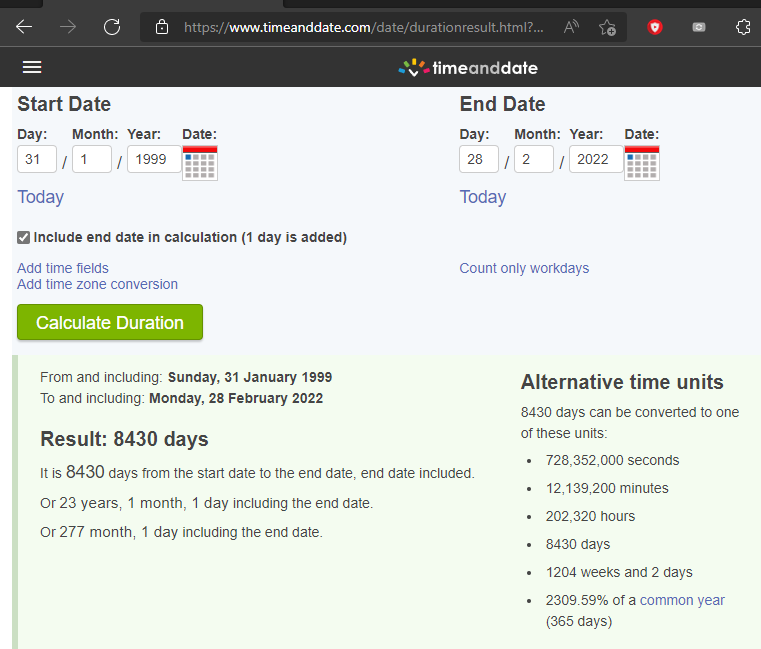

In [ ]:
len(df_nap.columns)

In [ ]:
df_nap.isnull().sum().sum()

## final output

In [ ]:
df_nap

# Feed Stuff Price

https://data.cso.ie/table/AJM04
    
https://data.cso.ie/table/AJM08    

## feed_stuff_price_1976-2018

In [ ]:
df_feed_2018 = pd.read_csv("data/ie/feed_stuff_price_1976-2018.csv")

In [ ]:
df_feed_2018

In [ ]:
snake_case_columns(df_feed_2018)

In [ ]:
cso_date_to_datetime(df_feed_2018, "month")

In [ ]:
df_feed_2018 = df_feed_2018[df_feed_2018.month.dt.year > 1998]

In [ ]:
df_feed_2018.unit.unique()

In [ ]:
df_feed_2018 = df_feed_2018.pivot(index='month', columns='type_of_feedstuff', values='value')

In [ ]:
df_feed_2018

In [ ]:
df_feed_2018.columns = map(lambda x : reg_not_words.sub("",x).replace(" ", "_").replace("__", "_").lower(), df_feed_2018.columns)

In [ ]:
df_feed_2018.isnull().sum()

In [ ]:
for index, value in df_feed_2018.isna().any().items():
    if value:
        print(index)
        df_feed_2018[index] = df_feed_2018[index].interpolate(method='linear')

In [ ]:
df_feed_2018.isnull().sum()

In [ ]:
df_feed_2018 = df_feed_2018.dropna(axis='columns')

In [ ]:
df_feed_2018.isnull().sum()

In [ ]:
df_feed_2018.info()

### intermediarte ouput

In [ ]:
df_feed_2018

## feed_stuff_price_2014-2022

In [ ]:
df_feed_2022 = pd.read_csv("data/ie/feed_stuff_price_2014-2022.csv")

In [ ]:
df_feed_2022

In [ ]:
snake_case_columns(df_feed_2022)

In [ ]:
cso_date_to_datetime(df_feed_2022, "month")

In [ ]:
df_feed_2022 = df_feed_2022.pivot(index='month', columns='type_of_feedstuff', values='value')

In [ ]:
df_feed_2022

In [ ]:
df_feed_2022 = df_feed_2022.replace(".", np.nan)

In [ ]:
df_feed_2022 = df_feed_2022.astype("float64")

In [ ]:
df_feed_2022.columns = map(lambda x : reg_not_words.sub("",x).replace(" ", "_").replace("__", "_").lower(), df_feed_2022.columns)

In [ ]:
df_feed_2022.isnull().sum()

In [ ]:
for index, value in df_feed_2022.isna().any().items():
    if value:
        print(index)
        df_feed_2022[index] = df_feed_2022[index].interpolate(method='linear')

In [ ]:
df_feed_2022.isnull().sum()

In [ ]:
df_feed_2022 = df_feed_2022.dropna(axis="columns")

In [ ]:
df_feed_2022.isnull().sum()

In [ ]:
df_feed_2022.info()

### intermediate output

In [ ]:
df_feed_2022

In [ ]:
print("df_feed_2018.columns len is:", len(df_feed_2018.columns))
print("df_feed_2022.columns len is:", len(df_feed_2022.columns))

In [ ]:
print("df_feed_2018 min date", " : ", df_feed_2018.index.min())
print("df_feed_2018 max date", " : ", df_feed_2018.index.max())
print("df_feed_2022 min date", " : ", df_feed_2022.index.min())
print("df_feed_2022 max date", " : ", df_feed_2022.index.max())

In [ ]:
# intersection
sorted(list(set(df_feed_2018.columns) & set(df_feed_2022.columns)))

In [ ]:
df_feed_2018 = df_feed_2018[df_feed_2018.index.year < 2014]

In [ ]:
df_feed_2018.index.max()

In [ ]:
df_feed = pd.concat([df_feed_2018, df_feed_2022],join='inner', ignore_index=False)

In [ ]:
df_feed.info()

## final output

In [ ]:
df_feed

# fuel consumption

https://data.cso.ie/table/SEI06

data is yearly and mostly zeros so it won't be used

In [ ]:
df_fuel_consumption = pd.read_csv("data/ie/fuel_consumption_1990-2020.csv")

In [ ]:
df_fuel_consumption

In [ ]:
snake_case_columns(df_fuel_consumption)

In [ ]:
#cso_date_to_datetime(df_fuel_consumption, "month")

df_fuel_consumption = df_fuel_consumption.pivot(index='year', columns='fuel_type', values='value')

In [ ]:
df_fuel_consumption.index = pd.to_datetime(df_fuel_consumption.index, format='%Y')

In [ ]:
df_fuel_consumption.info()

In [ ]:
df_fuel_consumption = df_fuel_consumption[df_fuel_consumption.index.year > 1998]

In [ ]:
df_fuel_consumption.isnull().sum()

In [ ]:
df_fuel_consumption.dropna(axis="columns")

# COLLATE ALL DATAFRAMES TOGETHER

## merge beef and agri price index

In [ ]:
df_final= pd.merge(df_beef_2, df_agri_price_indices_final, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

## merge in pig prices

In [ ]:
df_final= pd.merge(df_final, df_pig, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

## merge in EURGBP

In [ ]:
df_final= pd.merge(df_final, df_eurgbp, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

## merge in EURUSD

In [ ]:
df_final= pd.merge(df_final, df_eurusd, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

## merge in global beef prices

In [ ]:
df_final= pd.merge(df_final, df_global_beef, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

## merge in sunshine

In [ ]:
df_final= pd.merge(df_final, df_sunshine, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

## merge in rain

In [ ]:
df_final= pd.merge(df_final, df_rain, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

## merge in temperature

In [ ]:
df_final= pd.merge(df_final, df_temp, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

## merge in fuel

In [ ]:
df_final= pd.merge(df_final, df_fuel, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

## merge in brent

In [ ]:
df_final= pd.merge(df_final, df_brent, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

## merge in crude

In [ ]:
df_final= pd.merge(df_final, df_crude, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

## merge in consumer price index

In [ ]:
df_final= pd.merge(df_final, df_cpi, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

## merge in national average prices

In [ ]:
df_final= pd.merge(df_final, df_nap, how='inner', left_index=True, right_index=True)

In [ ]:
df_final.isnull().sum().sum()

In [ ]:
df_final.shape

# Save collated dataframe to csv

In [ ]:
df_final.to_csv("df_final_irish_beef_feat_cols_and_target_values_1999-2022.csv", encoding='utf-8')

# Australian Beef prices

https://www.indexmundi.com/commodities/?commodity=beef&months=360&currency=aud

In [ ]:
df_beef_aus = pd.read_csv("data/aus/beef_aus_1995-2022.csv")

In [ ]:
df_beef_aus

In [ ]:
df_beef_aus.info()

In [ ]:
snake_case_columns(df_beef_aus)

In [ ]:
df_beef_aus = df_beef_aus.rename(columns = {"price":"beef_per_kg"})

In [ ]:
df_beef_aus["month"] = pd.to_datetime(df_beef_aus["month"], format='%b-%y') + MonthEnd(1)

In [ ]:
df_beef_aus.info()

In [ ]:
df_beef_aus = df_beef_aus.drop(["change"], axis=1)

In [ ]:
df_beef_aus = df_beef_aus.set_index("month")

## final output

In [ ]:
df_beef_aus

# Australia Beef and Veal Meat Domestic Consumption by Year

https://www.indexmundi.com/agriculture/?country=au&commodity=beef-and-veal-meat&graph=domestic-consumption

In [ ]:
df_meat_consumption_aus = pd.read_csv("data/aus/au-beef-and-veal-meat-domestic-consumption.csv")

In [ ]:
df_meat_consumption_aus.columns

In [ ]:
df_meat_consumption_aus

In [ ]:
df_meat_consumption_aus.info()

In [ ]:
snake_case_columns(df_meat_consumption_aus)

In [ ]:
df_meat_consumption_aus["market_year"] = pd.to_datetime(df_meat_consumption_aus["market_year"], format='%Y') + YearEnd(1)

In [ ]:
df_meat_consumption_aus

In [ ]:
df_meat_consumption_aus = df_meat_consumption_aus.rename(columns={"market_year" : "month", "_value" : "meat_consumption" })

In [ ]:
df_meat_consumption_aus = df_meat_consumption_aus.drop(["_unit_description"], axis=1)

In [ ]:
df_meat_consumption_aus = df_meat_consumption_aus.set_index("month")

In [ ]:
df_meat_consumption_aus.isnull().sum()

In [ ]:
df_meat_consumption_aus

In [ ]:
df_meat_consumption_aus_monthly = df_meat_consumption_aus.resample('M').last()

In [ ]:
df_meat_consumption_aus_monthly.head(20)

In [ ]:
df_meat_consumption_aus_monthly = df_meat_consumption_aus.resample('M').last().bfill() / 12

In [ ]:
df_meat_consumption_aus_monthly[df_meat_consumption_aus_monthly.index.year==1961].sum()

In [ ]:
# 1960 shows only one row but it won't be used anyway
df_meat_consumption_aus_monthly[(df_meat_consumption_aus_monthly.index.year == 1960) ]

In [ ]:
df_meat_consumption_aus_monthly[(df_meat_consumption_aus_monthly.index.year >= 1960) & (df_meat_consumption_aus_monthly.index.year < 1963)]

In [ ]:
df_meat_consumption_aus_monthly[(df_meat_consumption_aus_monthly.index.year > 2000) & (df_meat_consumption_aus_monthly.index.year < 2003)]

In [ ]:
df_meat_consumption_aus_monthly.info()

In [ ]:
df_meat_consumption_aus_monthly = df_meat_consumption_aus_monthly[df_meat_consumption_aus_monthly.index.year > 1989]

In [ ]:
df_meat_consumption_aus_monthly = df_meat_consumption_aus_monthly[df_meat_consumption_aus_monthly.index.year < 2022]

## final outoput

In [ ]:
df_meat_consumption_aus_monthly

# Australia Beef and Veal Meat Exports by Year

In [9]:
df_exports_aus = pd.read_csv("data/aus/au-beef-and-veal-meat-exports.csv")

In [10]:
df_exports_aus

,Market Year,Value,Unit Description
0,1960,165,(1000 MT CWE)
1,1961,275,(1000 MT CWE)
2,1962,382,(1000 MT CWE)
3,1963,426,(1000 MT CWE)
4,1964,442,(1000 MT CWE)
...,...,...,...
58,2018,1582,(1000 MT CWE)
59,2019,1739,(1000 MT CWE)
60,2020,1473,(1000 MT CWE)
61,2021,1320,(1000 MT CWE)


In [12]:
# just use the user-defined fucntion from my utils.py this time
df_exports_aus_M = transform_indexmundi_yearly_data(df_exports_aus, "meat_exports")

In [14]:
df_exports_aus_M.isnull().sum()

meat_exports    0
dtype: int64

In [15]:
df_exports_aus_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 1990-01-31 to 2021-12-31
Freq: M
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meat_exports  384 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


## final output

In [13]:
df_exports_aus_M

,meat_exports
month,
1990-01-31,88.666667
1990-02-28,88.666667
1990-03-31,88.666667
1990-04-30,88.666667
1990-05-31,88.666667
...,...
2021-08-31,110.000000
2021-09-30,110.000000
2021-10-31,110.000000


# Australia Beef and Veal Meat Imports by Year

In [16]:
df_imports_aus = pd.read_csv("data/aus/au-beef-and-veal-meat-imports.csv")

In [17]:
df_imports_aus

,Market Year,Value,Unit Description
0,1960,0,(1000 MT CWE)
1,1961,0,(1000 MT CWE)
2,1962,0,(1000 MT CWE)
3,1963,0,(1000 MT CWE)
4,1964,0,(1000 MT CWE)
...,...,...,...
58,2018,14,(1000 MT CWE)
59,2019,15,(1000 MT CWE)
60,2020,17,(1000 MT CWE)
61,2021,25,(1000 MT CWE)


In [19]:
df_imports_aus_M = transform_indexmundi_yearly_data(df_imports_aus, "meat_imports")

In [20]:
df_imports_aus_M.isnull().sum()

meat_imports    0
dtype: int64

In [21]:
df_imports_aus_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 1990-01-31 to 2021-12-31
Freq: M
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meat_imports  384 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


## final output

In [22]:
df_imports_aus_M

,meat_imports
month,
1990-01-31,0.000000
1990-02-28,0.000000
1990-03-31,0.000000
1990-04-30,0.000000
1990-05-31,0.000000
...,...
2021-08-31,2.083333
2021-09-30,2.083333
2021-10-31,2.083333


# Australia Beef and Veal Meat Production by Year

https://www.indexmundi.com/agriculture/?country=au&commodity=beef-and-veal-meat&graph=production

In [23]:
df_meat_prod_aus = pd.read_csv("data/aus/au-beef-and-veal-meat-production.csv")

In [24]:
df_meat_prod_aus

,Market Year,Value,Unit Description
0,1960,685,(1000 MT CWE)
1,1961,730,(1000 MT CWE)
2,1962,879,(1000 MT CWE)
3,1963,957,(1000 MT CWE)
4,1964,998,(1000 MT CWE)
...,...,...,...
58,2018,2309,(1000 MT CWE)
59,2019,2432,(1000 MT CWE)
60,2020,2125,(1000 MT CWE)
61,2021,1900,(1000 MT CWE)


In [25]:
df_meat_prod_aus_M = transform_indexmundi_yearly_data(df_meat_prod_aus, "meat_production")

In [26]:
df_meat_prod_aus_M.isnull().sum()

meat_production    0
dtype: int64

In [27]:
df_meat_prod_aus_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 1990-01-31 to 2021-12-31
Freq: M
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meat_production  384 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


## final output

In [28]:
df_meat_prod_aus_M

,meat_production
month,
1990-01-31,143.166667
1990-02-28,143.166667
1990-03-31,143.166667
1990-04-30,143.166667
1990-05-31,143.166667
...,...
2021-08-31,158.333333
2021-09-30,158.333333
2021-10-31,158.333333


# Australia Beef and Veal Meat Total Distribution by Year

https://www.indexmundi.com/agriculture/?country=au&commodity=beef-and-veal-meat&graph=total-distribution

In [29]:
df_meat_dist_aus = pd.read_csv("data/aus/au-beef-and-veal-meat-total-distribution.csv")

In [30]:
df_meat_dist_aus

,Market Year,Value,Unit Description
0,1960,701,(1000 MT CWE)
1,1961,745,(1000 MT CWE)
2,1962,903,(1000 MT CWE)
3,1963,976,(1000 MT CWE)
4,1964,1022,(1000 MT CWE)
...,...,...,...
58,2018,2323,(1000 MT CWE)
59,2019,2447,(1000 MT CWE)
60,2020,2142,(1000 MT CWE)
61,2021,1925,(1000 MT CWE)


In [31]:
df_meat_dist_aus_M = transform_indexmundi_yearly_data(df_meat_dist_aus, "meat_distribution")

In [32]:
df_meat_dist_aus_M.isnull().sum()

meat_distribution    0
dtype: int64

In [33]:
df_meat_dist_aus_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 1990-01-31 to 2021-12-31
Freq: M
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   meat_distribution  384 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


## final output

In [34]:
df_meat_dist_aus_M

,meat_distribution
month,
1990-01-31,145.333333
1990-02-28,145.333333
1990-03-31,145.333333
1990-04-30,145.333333
1990-05-31,145.333333
...,...
2021-08-31,160.416667
2021-09-30,160.416667
2021-10-31,160.416667


# Australia Beef and Veal Meat Total Supply by Year

https://www.indexmundi.com/agriculture/?country=au&commodity=beef-and-veal-meat&graph=total-supply

In [35]:
df_beef_supply_aus = pd.read_csv("data/aus/au-beef-and-veal-meat-total-supply.csv")

In [36]:
df_beef_supply_aus

,Market Year,Value,Unit Description
0,1960,701,(1000 MT CWE)
1,1961,745,(1000 MT CWE)
2,1962,903,(1000 MT CWE)
3,1963,976,(1000 MT CWE)
4,1964,1022,(1000 MT CWE)
...,...,...,...
58,2018,2323,(1000 MT CWE)
59,2019,2447,(1000 MT CWE)
60,2020,2142,(1000 MT CWE)
61,2021,1925,(1000 MT CWE)


In [38]:
df_beef_supply_aus_M = transform_indexmundi_yearly_data(df_beef_supply_aus, "meat_supply")

In [39]:
df_beef_supply_aus_M.isnull().sum()

meat_supply    0
dtype: int64

In [40]:
df_beef_supply_aus_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 1990-01-31 to 2021-12-31
Freq: M
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meat_supply  384 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


## final output

In [41]:
df_beef_supply_aus_M

,meat_supply
month,
1990-01-31,145.333333
1990-02-28,145.333333
1990-03-31,145.333333
1990-04-30,145.333333
1990-05-31,145.333333
...,...
2021-08-31,160.416667
2021-09-30,160.416667
2021-10-31,160.416667


# Australia Animal Numbers, Cattle Production by Year

https://www.indexmundi.com/agriculture/?country=au&commodity=cattle&graph=production

In [42]:
df_cattle_production_aus = pd.read_csv("data/aus/au-cattle-production.csv")

In [43]:
df_cattle_production_aus

,Market Year,Value,Unit Description
0,1960,0,(1000 HEAD)
1,1961,0,(1000 HEAD)
2,1962,0,(1000 HEAD)
3,1963,0,(1000 HEAD)
4,1964,0,(1000 HEAD)
...,...,...,...
58,2018,9100,(1000 HEAD)
59,2019,8700,(1000 HEAD)
60,2020,8300,(1000 HEAD)
61,2021,8200,(1000 HEAD)


In [45]:
df_cattle_production_aus_M = transform_indexmundi_yearly_data(df_cattle_production_aus, "cattle_production" )

In [46]:
df_cattle_production_aus_M.isnull().sum()

cattle_production    0
dtype: int64

In [47]:
df_cattle_production_aus_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 1990-01-31 to 2021-12-31
Freq: M
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cattle_production  384 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


## final output

In [48]:
df_cattle_production_aus_M

,cattle_production
month,
1990-01-31,754.833333
1990-02-28,754.833333
1990-03-31,754.833333
1990-04-30,754.833333
1990-05-31,754.833333
...,...
2021-08-31,683.333333
2021-09-30,683.333333
2021-10-31,683.333333


# Australia Animal Numbers, Swine Production by Year

https://www.indexmundi.com/agriculture/?country=au&commodity=swine&graph=production

In [49]:
df_swine_production_aus = pd.read_csv("data/aus/au-swine-production.csv")

In [50]:
df_swine_production_aus

,Market Year,Value,Unit Description
0,1960,0,(1000 HEAD)
1,1961,0,(1000 HEAD)
2,1962,0,(1000 HEAD)
3,1963,0,(1000 HEAD)
4,1964,0,(1000 HEAD)
5,1965,0,(1000 HEAD)
6,1966,0,(1000 HEAD)
7,1967,3202,(1000 HEAD)
8,1968,3379,(1000 HEAD)
9,1969,3676,(1000 HEAD)


In [51]:
df_swine_production_aus_M = transform_indexmundi_yearly_data(df_swine_production_aus, "swine_production")

In [52]:
df_swine_production_aus_M.isnull().sum()

swine_production    0
dtype: int64

In [53]:
df_swine_production_aus_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1990-01-31 to 2016-12-31
Freq: M
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   swine_production  324 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


## final output

In [54]:
df_swine_production_aus_M

,swine_production
month,
1990-01-31,389.583333
1990-02-28,389.583333
1990-03-31,389.583333
1990-04-30,389.583333
1990-05-31,389.583333
...,...
2016-08-31,419.000000
2016-09-30,419.000000
2016-10-31,419.000000


# Australia Barley Production by Year

https://www.indexmundi.com/agriculture/?country=au&commodity=barley&graph=production

In [55]:
df_barley_production_aus = pd.read_csv("data/aus/au-barley-production.csv")

In [56]:
df_barley_production_aus

,Market Year,Value,Unit Description
0,1960,1542,(1000 MT)
1,1961,941,(1000 MT)
2,1962,898,(1000 MT)
3,1963,984,(1000 MT)
4,1964,1118,(1000 MT)
...,...,...,...
57,2017,9254,(1000 MT)
58,2018,8819,(1000 MT)
59,2019,10127,(1000 MT)
60,2020,13100,(1000 MT)


In [57]:
df_barley_production_aus_M = transform_indexmundi_yearly_data(df_barley_production_aus, "barley_production")

In [58]:
df_barley_production_aus_M.isnull().sum()

barley_production    0
dtype: int64

In [59]:
df_barley_production_aus_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 1990-01-31 to 2021-12-31
Freq: M
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   barley_production  384 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


## final output

In [60]:
df_barley_production_aus_M

,barley_production
month,
1990-01-31,348.666667
1990-02-28,348.666667
1990-03-31,348.666667
1990-04-30,348.666667
1990-05-31,348.666667
...,...
2021-08-31,1083.333333
2021-09-30,1083.333333
2021-10-31,1083.333333


# Australia Beef and Veal Meat Production by Year

https://www.indexmundi.com/agriculture/?country=au&commodity=beef-and-veal-meat&graph=production

In [61]:
df_beef_and_veal_production_aus = pd.read_csv("data/aus/au-beef-and-veal-meat-production.csv")

In [62]:
df_beef_and_veal_production_aus

,Market Year,Value,Unit Description
0,1960,685,(1000 MT CWE)
1,1961,730,(1000 MT CWE)
2,1962,879,(1000 MT CWE)
3,1963,957,(1000 MT CWE)
4,1964,998,(1000 MT CWE)
...,...,...,...
58,2018,2309,(1000 MT CWE)
59,2019,2432,(1000 MT CWE)
60,2020,2125,(1000 MT CWE)
61,2021,1900,(1000 MT CWE)


In [63]:
df_beef_and_veal_production_aus_M = transform_indexmundi_yearly_data(df_beef_and_veal_production_aus, "beef_and_veal_production")

In [64]:
df_beef_and_veal_production_aus_M.isnull().sum()

beef_and_veal_production    0
dtype: int64

In [65]:
df_beef_and_veal_production_aus_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 1990-01-31 to 2021-12-31
Freq: M
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   beef_and_veal_production  384 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


## final output

In [66]:
df_beef_and_veal_production_aus_M

,beef_and_veal_production
month,
1990-01-31,143.166667
1990-02-28,143.166667
1990-03-31,143.166667
1990-04-30,143.166667
1990-05-31,143.166667
...,...
2021-08-31,158.333333
2021-09-30,158.333333
2021-10-31,158.333333


# Australia Broiler Meat (Poultry) Production by Year

https://www.indexmundi.com/agriculture/?country=au&commodity=broiler-meat&graph=production

In [83]:
df_poultry_production_aus = pd.read_csv("data/aus/au-broiler-meat-production.csv")

In [84]:
df_poultry_production_aus

,Market Year,Value,Unit Description
0,1965,45,(1000 MT)
1,1966,56,(1000 MT)
2,1967,76,(1000 MT)
3,1968,89,(1000 MT)
4,1969,94,(1000 MT)
5,1970,105,(1000 MT)
6,1971,131,(1000 MT)
7,1972,142,(1000 MT)
8,1973,138,(1000 MT)
9,1974,171,(1000 MT)


In [85]:
df_poultry_production_aus_M = transform_indexmundi_yearly_data(df_poultry_production_aus, "poultry_production")

In [86]:
df_poultry_production_aus_M.isnull().sum()

poultry_production    0
dtype: int64

In [87]:
df_poultry_production_aus_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1990-01-31 to 2016-12-31
Freq: M
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   poultry_production  324 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


In [88]:
df_poultry_production_aus_M

,poultry_production
month,
1990-01-31,31.416667
1990-02-28,31.416667
1990-03-31,31.416667
1990-04-30,31.416667
1990-05-31,31.416667
...,...
2016-08-31,97.000000
2016-09-30,97.000000
2016-10-31,97.000000


In [102]:
# https://stackoverflow.com/questions/34915828/pandas-date-range-to-generate-monthly-data-at-beginning-of-the-month
# https://pandas.pydata.org/docs/reference/api/pandas.Index.to_frame.html
df_poultry_missing_months = pd.date_range(start='31-JAN-2017', end='31-DEC-2020', freq='M').to_frame(index=True, name='month').drop(["month"],axis=1)
df_poultry_missing_months["poultry_production"] = np.nan
df_poultry_missing_months.index.rename('month', inplace=True)
df_poultry_missing_months.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2017-01-31 to 2020-12-31
Freq: M
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   poultry_production  0 non-null      float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [103]:
df_poultry_production_aus_M = df_poultry_production_aus_M.append(df_poultry_missing_months)

In [104]:
df_poultry_production_aus_M.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 1990-01-31 to 2020-12-31
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   poultry_production  324 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [106]:
df_poultry_production_aus_M["poultry_production"] = df_poultry_production_aus_M["poultry_production"].interpolate(method='linear')

In [111]:
df_poultry_production_aus_M[df_poultry_production_aus_M.index.year > 2019] ## ugh it'll have to do

,poultry_production
2020-01-31,97.0
2020-02-29,97.0
2020-03-31,97.0
2020-04-30,97.0
2020-05-31,97.0
2020-06-30,97.0
2020-07-31,97.0
2020-08-31,97.0
2020-09-30,97.0
2020-10-31,97.0


## final output

In [112]:
df_poultry_production_aus_M

,poultry_production
1990-01-31,31.416667
1990-02-28,31.416667
1990-03-31,31.416667
1990-04-30,31.416667
1990-05-31,31.416667
...,...
2020-08-31,97.000000
2020-09-30,97.000000
2020-10-31,97.000000
2020-11-30,97.000000
